In [1]:
import tensorflow as tf
import numpy as np
from cv2 import cv2 as cv
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.1


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def show(aim):
    [rows, cols] = aim.shape
    for row in range(rows):
        for col in range(cols):
            print(f"{aim[row, col]:4d}", end="")
        print("\n")
            
            
def output(aim):
    [rows, cols] = aim.shape
    with open('out.txt', 'w') as file:
        for row in range(rows):
            for col in range(cols):
                file.write(f"{aim[row, col]:4d}", )
            file.write("\n\n")


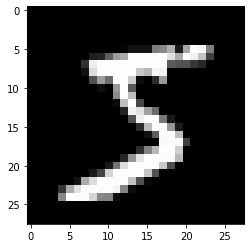

In [4]:
# BGR -> RGB
five = cv.cvtColor(x_train[0], cv.COLOR_BGR2RGB)
plt.imshow(five)

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Dense对上一层的神经元进行全部连接，实现特征的非线性组合。
  tf.keras.layers.Dense(784, activation='relu'),
  # Dropout将在训练过程中每次更新参数时随机断开一定百分比（rate）的输入神经元，Dropout层用于防止过拟合。
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

model.save("handwriting.h5")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2066 - accuracy: 0.9385
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0913 - accuracy: 0.9722
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0657 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0507 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0392 - accuracy: 0.9872
10000/1 - 1s - loss: 0.0391 - accuracy: 0.9766


#### 模型预测值

Label of it: 0
Predict value: 0


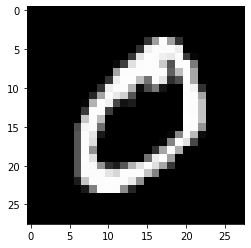

In [6]:
saved_model = tf.keras.models.load_model("handwriting.h5")
# 测试数据与标签值对比
res = saved_model.predict(np.array([x_train[1]]))
res = res[0].tolist()
print(f"Label of it: {y_train[1]}")
print(f"Predict value: {res.index(max(res))}")
plt.imshow(cv.cvtColor(x_train[1].astype(np.float32), cv.COLOR_BGR2RGB))

#### 图片预测值

[3.2140541855567306e-13, 1.3846646140791563e-07, 0.9999982118606567, 1.6902210973057663e-06, 3.4546878691088523e-09, 6.489160875311484e-10, 1.769771174053858e-08, 3.972676788227547e-12, 9.475522588786589e-09, 1.9242939273336198e-21]
Predict value: 2


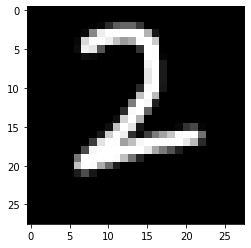

In [7]:
# 图片预测结果
img = cv.imread('2.jpeg', cv.IMREAD_GRAYSCALE)
scale_img = cv.resize(img, (28, 28), interpolation=cv.INTER_AREA)
plt.imshow(cv.cvtColor(scale_img, cv.COLOR_BGR2RGB))

res = saved_model.predict(np.array([scale_img])/255.0)
res = res[0].tolist()
print(res)
print(f"Predict value: {res.index(max(res))}")